<a href="https://colab.research.google.com/github/cacress/CSC442/blob/main/(Version_2)_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Python notebook modifies several aspects of our previous merging/cleaning/wrangling process which include, but are not limited to:
- More systematic approach for dealing with duplicate ids
- Keeping some variables we previously deleted (e.g., imdb_score, tmdb_score)
- Creating new variables such as genres_count and production_countries_count
- Updating genres to be a full list of unique genres (as opposed to one)
- Adding (experimental) variables to quantify uniqueness of the genres, production_countries, and titles variables

Currently in the works:
- Performing EDA separately using these variables.

In [1]:
# Import pandas
import pandas as pd

# Read in the file and print out the DataFrame

hulu_data = pd.read_csv("https://raw.githubusercontent.com/cacress/CSC442/refs/heads/main/datasets/titles_hulu.csv")
netflix_data = pd.read_csv("https://raw.githubusercontent.com/cacress/CSC442/refs/heads/main/datasets/titles_netflix.csv")

In [2]:
hulu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2398 entries, 0 to 2397
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2398 non-null   object 
 1   title                 2398 non-null   object 
 2   type                  2398 non-null   object 
 3   description           2385 non-null   object 
 4   release_year          2398 non-null   int64  
 5   age_certification     1713 non-null   object 
 6   runtime               2398 non-null   int64  
 7   genres                2398 non-null   object 
 8   production_countries  2398 non-null   object 
 9   seasons               1330 non-null   float64
 10  imdb_id               2263 non-null   object 
 11  imdb_score            2232 non-null   float64
 12  imdb_votes            2231 non-null   float64
 13  tmdb_popularity       2348 non-null   float64
 14  tmdb_score            2238 non-null   float64
dtypes: float64(5), int64(

In [3]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [4]:
# First, we filter out the observations from the Hulu and Netflix datasets if the
# observations is without a title, is without a imdb_score and tmdb_score, or
# is without tmdb_popularity
netflix_data.dropna(subset=['title', 'tmdb_popularity'], inplace=True)
netflix_data = netflix_data[netflix_data['imdb_score'].notnull() | netflix_data['tmdb_score'].notnull()]

hulu_data.dropna(subset=['title', 'tmdb_popularity'], inplace=True)
hulu_data = hulu_data[hulu_data['imdb_score'].notnull() | hulu_data['tmdb_score'].notnull()]

# Remove observations from both datasets that have '[]' value for genres or production_countries
netflix_data = netflix_data[netflix_data['genres'] != "[]"]
netflix_data = netflix_data[netflix_data['production_countries'] != "[]"]

hulu_data = hulu_data[hulu_data['genres'] != "[]"]
hulu_data = hulu_data[hulu_data['production_countries'] != "[]"]

# This removes about 125 and 350 observations from the Hulu and Netflix datasets, respectively

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5501 entries, 1 to 5847
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5501 non-null   object 
 1   title                 5501 non-null   object 
 2   type                  5501 non-null   object 
 3   description           5495 non-null   object 
 4   release_year          5501 non-null   int64  
 5   age_certification     3101 non-null   object 
 6   runtime               5501 non-null   int64  
 7   genres                5501 non-null   object 
 8   production_countries  5501 non-null   object 
 9   seasons               1988 non-null   float64
 10  imdb_id               5194 non-null   object 
 11  imdb_score            5157 non-null   float64
 12  imdb_votes            5143 non-null   float64
 13  tmdb_popularity       5501 non-null   float64
 14  tmdb_score            5375 non-null   float64
dtypes: float64(5), int64(2), o

In [6]:
hulu_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2273 entries, 0 to 2396
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2273 non-null   object 
 1   title                 2273 non-null   object 
 2   type                  2273 non-null   object 
 3   description           2272 non-null   object 
 4   release_year          2273 non-null   int64  
 5   age_certification     1663 non-null   object 
 6   runtime               2273 non-null   int64  
 7   genres                2273 non-null   object 
 8   production_countries  2273 non-null   object 
 9   seasons               1243 non-null   float64
 10  imdb_id               2173 non-null   object 
 11  imdb_score            2162 non-null   float64
 12  imdb_votes            2161 non-null   float64
 13  tmdb_popularity       2273 non-null   float64
 14  tmdb_score            2194 non-null   float64
dtypes: float64(5), int64(2), o

In [7]:
# Concatentate datasets, we plan to merge first than focus on cleaning/wrangling
combined_df = pd.concat([hulu_data, netflix_data])
combined_df.shape

(7774, 15)

In [8]:
# Suggested option according to pandas documentation
pd.options.mode.copy_on_write = True

# Check for duplicate rows using the duplicated().sum() functions - returns number of duplicate rows
num_duplicates = combined_df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

# Check if there are duplicate IDs
duplicates_exist = combined_df['id'].duplicated().any()
print("\nAre there duplicate IDs?:", duplicates_exist)

# Extract the duplicate rows and store in separate dataframe
duplicate_rows_df = combined_df[combined_df['id'].duplicated(keep=False)]
duplicate_rows_df.sort_values(by='id', inplace=True, ignore_index=True)
# Remove the duplicate rows from the original merged dataset
combined_df.drop_duplicates(subset=['id'], keep=False, inplace=True)

print(duplicate_rows_df.shape)
print(combined_df.shape)
duplicate_rows_df.head()

# We have 172 observations in duplicate_rows_df, meaning with have 86 movies/shows
# that have appeared in both the Hulu and Netflix datasets

Number of duplicate rows: 0

Are there duplicate IDs?: True
(172, 15)
(7602, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['animation', 'comedy', 'family', 'action', 'f...",['US'],NaN,tt0243585,5.5,54193.0,36.691,5.733
1,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['comedy', 'fantasy', 'animation', 'family']",['US'],NaN,tt0243585,5.5,53746.0,32.090,5.700
2,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,135,"['drama', 'comedy', 'romance']","['GB', 'US']",NaN,tt0314331,7.6,476101.0,36.484,7.100
3,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,139,"['drama', 'comedy', 'romance']","['US', 'GB']",NaN,tt0314331,7.6,474176.0,21.297,7.100
4,tm140391,Pan,MOVIE,Living a bleak existence at a London orphanage...,2015,PG,111,"['action', 'fantasy', 'family', 'comedy']","['US', 'GB']",NaN,tt3332064,5.7,63788.0,24.494,6.000


In [9]:
# To deal with observations with duplicate ids, will edit the first instance of each movie/show
# such that we can add this instance back to the original concatenated dataset while deleting
# the second instance.

# Here is the procedure (assuming all other non-mentioned variables are kept consistent across instances):
# 1) Use the value for runtime that is higher among the two observations -- keep the same if both are equal
# 2) For genres, convert it to a list that stores the unique genres from both instances
# 3) If the first instance has higher imdb_votes, use its values for imdb_score, imdb_votes, tmdb_popularity, and tmdb_score
#       else if the second instance has higher imdb_votes, use its values for the same variables
#       else if both have the same imdb_votes, then use the values for imdb_score, imdb_votes, tmdb_popularity, and tmdb_score that are highest, if not equal

In [10]:
# Example below of two instances of the same movie
obs_1 = duplicate_rows_df.iloc[1]
obs_2 = duplicate_rows_df.iloc[0]
# We will edit obs_1 based on the procedure described in the previous comment block

''' Dealing with different runtimes '''
if (obs_1['runtime'] < obs_2['runtime']):
    obs_1['runtime'] = obs_2['runtime']

''' Dealing with different genres '''
# Convert the values in the genres variable to lists
import ast
genre_list_1 = ast.literal_eval(obs_1['genres'])
genre_list_2 = ast.literal_eval(obs_2['genres'])

print('BEFORE\nobs_1 genres:', genre_list_1)
print('obs_2 genres:', genre_list_2)

# Iterate through genre_list_2 and check if each element is in genre_list_1. If not, add it to genre_list_1
for genre in genre_list_2:
    if genre not in genre_list_1:
        genre_list_1.append(genre)

# Both genre_list_1 and genre_list_2 should have the same elements, possibly in different orders
print('AFTER\nobs_1 genres:', genre_list_1)
print('obs_2 genres:', genre_list_2)

# Convert the list back to a string
obs_1['genres'] = str(genre_list_1)

''' Dealing with different imdb_votes '''
if (obs_1['imdb_votes'] < obs_2['imdb_votes']):
    obs_1['imdb_score'] = obs_2['imdb_score']
    obs_1['imdb_votes'] = obs_2['imdb_votes']
    obs_1['tmdb_popularity'] = obs_2['tmdb_popularity']
    obs_1['tmdb_score'] = obs_2['tmdb_score']
else:
    obs_1['imdb_votes'] = max(obs_1['imdb_votes'], obs_2['imdb_votes'])
    obs_1['imdb_score'] = max(obs_1['imdb_score'], obs_2['imdb_score'])
    obs_1['tmdb_popularity'] = max(obs_1['tmdb_popularity'], obs_2['tmdb_popularity'])
    obs_1['tmdb_score'] = max(obs_1['tmdb_score'], obs_2['tmdb_score'])

# obs_1 now has updated values for runtime, genres, imdb_score, imdb_votes, tmdb_popularity, and tmdb_score
print(obs_1)

BEFORE
obs_1 genres: ['comedy', 'fantasy', 'animation', 'family']
obs_2 genres: ['animation', 'comedy', 'family', 'action', 'fantasy']
AFTER
obs_1 genres: ['comedy', 'fantasy', 'animation', 'family', 'action']
obs_2 genres: ['animation', 'comedy', 'family', 'action', 'fantasy']
id                                                               tm114476
title                                                     Stuart Little 2
type                                                                MOVIE
description             Stuart, an adorable white mouse, still lives h...
release_year                                                         2002
age_certification                                                       G
runtime                                                                78
genres                  ['comedy', 'fantasy', 'animation', 'family', '...
production_countries                                               ['US']
seasons                                                

In [11]:
import ast

# Now do the same for the rest of duplicate_rows_df
for i in range(1, len(duplicate_rows_df), 2):
    obs_2 = duplicate_rows_df.iloc[i]
    obs_1 = duplicate_rows_df.iloc[i-1]

    ''' Dealing with different runtimes '''
    if (obs_1['runtime'] < obs_2['runtime']):
      obs_1['runtime'] = obs_2['runtime']

    ''' Dealing with different genres '''
    # Convert the values in the genres variable to lists
    genre_list_1 = ast.literal_eval(obs_1['genres'])
    genre_list_2 = ast.literal_eval(obs_2['genres'])

    # Iterate through genre_list_2 and check if each element is in genre_list_1. If not, add it to genre_list_1
    for genre in genre_list_2:
      if genre not in genre_list_1:
        genre_list_1.append(genre)

    # Convert the list back to a string
    obs_1['genres'] = str(genre_list_1)

    ''' Dealing with different imdb_votes '''
    if (obs_1['imdb_votes'] < obs_2['imdb_votes']):
      obs_1['imdb_score'] = obs_2['imdb_score']
      obs_1['imdb_votes'] = obs_2['imdb_votes']
      obs_1['tmdb_popularity'] = obs_2['tmdb_popularity']
      obs_1['tmdb_score'] = obs_2['tmdb_score']
    else:
      obs_1['imdb_votes'] = max(obs_1['imdb_votes'], obs_2['imdb_votes'])
      obs_1['imdb_score'] = max(obs_1['imdb_score'], obs_2['imdb_score'])
      obs_1['tmdb_popularity'] = max(obs_1['tmdb_popularity'], obs_2['tmdb_popularity'])
      obs_1['tmdb_score'] = max(obs_1['tmdb_score'], obs_2['tmdb_score'])

    duplicate_rows_df.iloc[i-1] = obs_1

duplicate_rows_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['animation', 'comedy', 'family', 'action', 'f...",['US'],NaN,tt0243585,5.5,54193.0,36.691,5.733
1,tm114476,Stuart Little 2,MOVIE,"Stuart, an adorable white mouse, still lives h...",2002,G,78,"['comedy', 'fantasy', 'animation', 'family']",['US'],NaN,tt0243585,5.5,53746.0,32.090,5.700
2,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,139,"['drama', 'comedy', 'romance']","['GB', 'US']",NaN,tt0314331,7.6,476101.0,36.484,7.100
3,tm133767,Love Actually,MOVIE,'Love Actually' follows the lives of eight ver...,2003,R,139,"['drama', 'comedy', 'romance']","['US', 'GB']",NaN,tt0314331,7.6,474176.0,21.297,7.100
4,tm140391,Pan,MOVIE,Living a bleak existence at a London orphanage...,2015,PG,111,"['action', 'fantasy', 'family', 'comedy']","['US', 'GB']",NaN,tt3332064,5.7,63788.0,24.494,6.000


In [12]:
# Now we can remove the second instance of each movie/show then add the remaining observations back the combined_df
for i in range(1, len(duplicate_rows_df), 2):
  duplicate_rows_df.drop(i, inplace=True)

# Reset the indexes of the rows.
duplicate_rows_df.reset_index(drop=True, inplace=True)

# Check for duplicate ids in duplicate_rows_df
duplicates_exist = duplicate_rows_df['id'].duplicated().any()
print("\nAre there duplicate IDs?:", duplicates_exist)

# Concatenate combined_df and duplicate_rows_df
combined_df = pd.concat([combined_df, duplicate_rows_df], ignore_index=True)
combined_df.shape



Are there duplicate IDs?: False


(7688, 15)

In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7688 non-null   object 
 1   title                 7688 non-null   object 
 2   type                  7688 non-null   object 
 3   description           7681 non-null   object 
 4   release_year          7688 non-null   int64  
 5   age_certification     4685 non-null   object 
 6   runtime               7688 non-null   int64  
 7   genres                7688 non-null   object 
 8   production_countries  7688 non-null   object 
 9   seasons               3166 non-null   float64
 10  imdb_id               7282 non-null   object 
 11  imdb_score            7234 non-null   float64
 12  imdb_votes            7219 non-null   float64
 13  tmdb_popularity       7688 non-null   float64
 14  tmdb_score            7483 non-null   float64
dtypes: float64(5), int64(

In [14]:
# Now that we've removed rows with the same id, we can do further cleaning/wrangling

# First, remove the id, description, and imdb_id columns from combined_df
combined_df.drop(columns=['id', 'description', 'imdb_id'], inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 7688 non-null   object 
 1   type                  7688 non-null   object 
 2   release_year          7688 non-null   int64  
 3   age_certification     4685 non-null   object 
 4   runtime               7688 non-null   int64  
 5   genres                7688 non-null   object 
 6   production_countries  7688 non-null   object 
 7   seasons               3166 non-null   float64
 8   imdb_score            7234 non-null   float64
 9   imdb_votes            7219 non-null   float64
 10  tmdb_popularity       7688 non-null   float64
 11  tmdb_score            7483 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 720.9+ KB


In [15]:
# Next, we will sort the values in genres and production_countries alphabetically,
# whilst also creating two new variables genres_count and production_countries_count
# We also create another variable, top_genres, that will store what we assume to be the two most
# important or most applicable genres of the movie/show

for i in range(len(combined_df)):
  obs = combined_df.iloc[i]

  # Extract the first two genres (assuming these are two most important) and store in top_genres variable
  top_list = ast.literal_eval(obs['genres'])[:2]
  top_list.sort()
  combined_df.loc[i, 'top_genres'] = str(top_list)

  # Evaluate the values in genres and production_countries as lists
  genre_list = ast.literal_eval(obs['genres'])
  production_countries_list = ast.literal_eval(obs['production_countries'])
  # Then sort alphabetically
  genre_list.sort()
  production_countries_list.sort()

  # Update the genres and production_countries values
  combined_df.loc[i, 'genres'] = str(genre_list)
  combined_df.loc[i, 'production_countries'] = str(production_countries_list)
  # Add the new genres_count and production_countries_count variables
  combined_df.loc[i, 'genres_count'] = len(genre_list)
  combined_df.loc[i, 'production_countries_count'] = len(production_countries_list)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       7688 non-null   object 
 1   type                        7688 non-null   object 
 2   release_year                7688 non-null   int64  
 3   age_certification           4685 non-null   object 
 4   runtime                     7688 non-null   int64  
 5   genres                      7688 non-null   object 
 6   production_countries        7688 non-null   object 
 7   seasons                     3166 non-null   float64
 8   imdb_score                  7234 non-null   float64
 9   imdb_votes                  7219 non-null   float64
 10  tmdb_popularity             7688 non-null   float64
 11  tmdb_score                  7483 non-null   float64
 12  top_genres                  7688 non-null   object 
 13  genres_count                7688 

In [16]:
# Before creating average_score, we will normalize tmdb_score to be on a 1 to 10 scale.
combined_df['tmdb_score'] = combined_df['tmdb_score'] * 9/10 + 1

# Rename tmdb_score to normalized_tmdb_score
combined_df.rename(columns={'tmdb_score': 'normalized_tmdb_score'}, inplace=True)

combined_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,normalized_tmdb_score,top_genres,genres_count,production_countries_count
0,Saturday Night Live,SHOW,1975,TV-14,89,"['comedy', 'music']",['US'],47.0,8.0,47910.0,54.345,7.21,"['comedy', 'music']",2.0,1.0
1,M*A*S*H,SHOW,1972,TV-PG,26,"['comedy', 'drama', 'war']",['US'],11.0,8.4,55882.0,27.308,8.20,"['comedy', 'war']",3.0,1.0
2,I Love Lucy,SHOW,1951,TV-G,30,"['comedy', 'family']",['US'],9.0,8.5,25944.0,17.088,8.29,"['comedy', 'family']",2.0,1.0
3,Taxi,SHOW,1978,TV-PG,25,"['comedy', 'drama']",['US'],5.0,7.7,13379.0,14.346,7.57,"['comedy', 'drama']",2.0,1.0
4,The Mary Tyler Moore Show,SHOW,1970,TV-PG,28,['comedy'],['US'],7.0,8.2,8692.0,9.290,7.75,['comedy'],1.0,1.0


In [17]:
# Next we will create a new variable called average_score which takes the mean of
# imdb_score and normalized_tmdb_score.
for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  # Check if the imdb_score is null
  if (pd.isna(obs['imdb_score'])):
    combined_df.loc[i, 'average_score'] = obs['normalized_tmdb_score']
  # Check if tmdb_score is null
  elif (pd.isna(obs['normalized_tmdb_score'])):
    combined_df.loc[i, 'average_score'] = obs['imdb_score']
  # Otherwise, average the two, making sure to normalize tmdb_score
  else:
    combined_df.loc[i, 'average_score'] = (obs['imdb_score'] + obs['normalized_tmdb_score']) / 2

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       7688 non-null   object 
 1   type                        7688 non-null   object 
 2   release_year                7688 non-null   int64  
 3   age_certification           4685 non-null   object 
 4   runtime                     7688 non-null   int64  
 5   genres                      7688 non-null   object 
 6   production_countries        7688 non-null   object 
 7   seasons                     3166 non-null   float64
 8   imdb_score                  7234 non-null   float64
 9   imdb_votes                  7219 non-null   float64
 10  tmdb_popularity             7688 non-null   float64
 11  normalized_tmdb_score       7483 non-null   float64
 12  top_genres                  7688 non-null   object 
 13  genres_count                7688 

In [18]:
# Create a new variable score_difference which is the difference between imdb_score and normalized_tmdb_score
# Note: this variable will be only applicable to observations with non-null IMDB/TMDB score
combined_df['score_difference'] = combined_df['imdb_score'] - combined_df['normalized_tmdb_score']
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       7688 non-null   object 
 1   type                        7688 non-null   object 
 2   release_year                7688 non-null   int64  
 3   age_certification           4685 non-null   object 
 4   runtime                     7688 non-null   int64  
 5   genres                      7688 non-null   object 
 6   production_countries        7688 non-null   object 
 7   seasons                     3166 non-null   float64
 8   imdb_score                  7234 non-null   float64
 9   imdb_votes                  7219 non-null   float64
 10  tmdb_popularity             7688 non-null   float64
 11  normalized_tmdb_score       7483 non-null   float64
 12  top_genres                  7688 non-null   object 
 13  genres_count                7688 

In [19]:
# Get number of observations that have either non null imdb_score and non null normalized tmdb score
combined_df[combined_df['imdb_score'].notnull() & combined_df['normalized_tmdb_score'].notnull()].shape
# This value should match the number of non-null values of the score_difference column

(7029, 17)

In [20]:
# Now convert type, release_year, age_certification, genres_count, and production_countries_count to categories
combined_df['type'] = combined_df['type'].astype('category')
combined_df['release_year'] = combined_df['release_year'].astype('category')
combined_df['age_certification'] = combined_df['age_certification'].astype('category')
combined_df['genres_count'] = combined_df['genres_count'].astype('category')
combined_df['production_countries_count'] = combined_df['production_countries_count'].astype('category')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   title                       7688 non-null   object  
 1   type                        7688 non-null   category
 2   release_year                7688 non-null   category
 3   age_certification           4685 non-null   category
 4   runtime                     7688 non-null   int64   
 5   genres                      7688 non-null   object  
 6   production_countries        7688 non-null   object  
 7   seasons                     3166 non-null   float64 
 8   imdb_score                  7234 non-null   float64 
 9   imdb_votes                  7219 non-null   float64 
 10  tmdb_popularity             7688 non-null   float64 
 11  normalized_tmdb_score       7483 non-null   float64 
 12  top_genres                  7688 non-null   object  
 13  genres_count      

In [21]:
# Convert seasons and imdb_votes to integers
combined_df['seasons'] = combined_df['seasons'].astype('Int64')
combined_df['imdb_votes'] = combined_df['imdb_votes'].astype('Int64')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7688 entries, 0 to 7687
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   title                       7688 non-null   object  
 1   type                        7688 non-null   category
 2   release_year                7688 non-null   category
 3   age_certification           4685 non-null   category
 4   runtime                     7688 non-null   int64   
 5   genres                      7688 non-null   object  
 6   production_countries        7688 non-null   object  
 7   seasons                     3166 non-null   Int64   
 8   imdb_score                  7234 non-null   float64 
 9   imdb_votes                  7219 non-null   Int64   
 10  tmdb_popularity             7688 non-null   float64 
 11  normalized_tmdb_score       7483 non-null   float64 
 12  top_genres                  7688 non-null   object  
 13  genres_count      

In [22]:
''' Calculating the uniqueness value for an observation's genres variable '''
# Uses term frequency, inverse document frequency approach based on GeeksForGeeks:
# https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

from sklearn.feature_extraction.text import TfidfVectorizer

# Create our 'documents,' which are the strings containing the actual genre categories of a movie/show
# To do this, we iterate through genres column and strip away the extra punctuation

# For example:
obs = combined_df.iloc[7683]
string = obs['genres']
string = string.replace("'", "")
string = string.replace("[", "")
string = string.replace("]", "")
string = string.replace(",", "")
print(string)

# Stores our 'documents' in a corpus
corpus = []

for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  string = obs['genres']
  string = string.replace("'", "")
  string = string.replace("[", "")
  string = string.replace("]", "")
  string = string.replace(",", "")
  corpus.append(string)

# Create TfidVectorizer object
tfidf = TfidfVectorizer()

# Generate tf-idf matrix
result = tfidf.fit_transform(corpus)

print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
  print(ele1, ':', ele2)

animation comedy drama fantasy romance thriller

idf values:
action : 2.566044120525474
animation : 2.9900486441552294
comedy : 1.908066095931732
crime : 2.8262935617876392
documentation : 2.860808080521604
drama : 1.6544968752637366
european : 3.5034147583317403
family : 3.175610459192579
fantasy : 3.0795716060618883
history : 4.092474092829754
horror : 3.5357277473222837
music : 4.095343535257706
reality : 3.971195105734247
romance : 2.720609996538892
scifi : 3.0559201179799276
sport : 4.509466706108985
thriller : 2.512698139820181
war : 4.55847428521568
western : 5.820411629987089


In [23]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


Word indexes:
{'comedy': 2, 'music': 11, 'drama': 5, 'war': 17, 'family': 7, 'fantasy': 8, 'scifi': 14, 'animation': 1, 'crime': 3, 'thriller': 16, 'romance': 13, 'action': 0, 'european': 6, 'reality': 12, 'documentation': 4, 'sport': 15, 'western': 18, 'history': 9, 'horror': 10}

tf-idf value:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 20897 stored elements and shape (7688, 19)>
  Coords	Values
  (0, 2)	0.42232299784889493
  (0, 11)	0.906445412304526
  (1, 2)	0.3661393533183109
  (1, 5)	0.31748188245042036
  (1, 17)	0.8747269449761946
  (2, 2)	0.5150314964707775
  (2, 7)	0.8571712533928513
  (3, 2)	0.7555245225783298
  (3, 5)	0.6551203674003633
  (4, 2)	1.0
  (5, 2)	0.5150314964707775
  (5, 7)	0.8571712533928513
  (6, 2)	1.0
  (7, 2)	0.33445196289972323
  (7, 7)	0.5566312161546051
  (7, 8)	0.5397972170532727
  (7, 14)	0.5356515081434099
  (8, 2)	1.0
  (9, 2)	0.3230451922946136
  (9, 5)	0.28011464716028056
  (9, 7)	0.5376468318523894
  (9, 8)	0.5213869707063276
  (

In [24]:
# Using this tfidf matrix, we can compute the mean distance of any movie/show using cosine distance
from sklearn.metrics.pairwise import cosine_distances

for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  distances = cosine_distances(result[i], result)
  combined_df.loc[i, 'genres_uniqueness'] = distances.mean()

combined_df[['genres', 'genres_count', 'genres_uniqueness']]

,genres,genres_count,genres_uniqueness
0,"['comedy', 'music']",2.0,0.873750
1,"['comedy', 'drama', 'war']",3.0,0.825484
2,"['comedy', 'family']",2.0,0.824894
3,"['comedy', 'drama']",2.0,0.676587
4,['comedy'],1.0,0.774358
...,...,...,...
7683,"['animation', 'comedy', 'drama', 'fantasy', 'r...",6.0,0.702033
7684,"['action', 'animation', 'drama', 'fantasy', 'h...",7.0,0.763637
7685,"['action', 'animation', 'fantasy', 'horror', '...",6.0,0.810601
7686,"['action', 'animation', 'drama', 'scifi', 'thr...",5.0,0.763303


In [25]:
combined_df[combined_df['genres_uniqueness'] > 0.9]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,normalized_tmdb_score,top_genres,genres_count,production_countries_count,average_score,score_difference,genres_uniqueness
10,Name That Tune,SHOW,1952,NaN,43,"['family', 'music']",['US'],1,6.8,48,0.600,NaN,"['family', 'music']",2.0,1.0,6.800,NaN,0.930911
159,Divorce Court,SHOW,1999,NaN,20,"['crime', 'reality']",['US'],22,4.1,311,16.719,3.97,"['crime', 'reality']",2.0,1.0,4.035,0.13,0.906791
183,RuPaul's Drag Race,SHOW,2009,TV-14,51,['reality'],['US'],14,8.5,19332,57.597,8.02,['reality'],1.0,1.0,8.260,0.48,0.955518
198,Top Chef,SHOW,2006,TV-14,46,['reality'],['US'],19,7.6,6111,39.458,7.03,['reality'],1.0,1.0,7.315,0.57,0.955518
205,Shark Tank,SHOW,2009,TV-PG,43,"['family', 'reality']",['US'],13,7.7,9516,38.821,7.12,"['family', 'reality']",2.0,1.0,7.410,0.58,0.922351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7654,America's Next Top Model,SHOW,2003,TV-14,44,['reality'],['US'],24,5.6,17905,14.501,5.77,['reality'],1.0,1.0,5.685,-0.17,0.955518
7663,Blippi Wonders,SHOW,2021,TV-Y,7,['animation'],['US'],1,NaN,<NA>,4.343,7.30,['animation'],1.0,1.0,7.300,NaN,0.925016
7671,Forged in Fire,SHOW,2015,TV-PG,42,['reality'],['US'],9,8.3,3632,34.934,8.47,['reality'],1.0,1.0,8.385,-0.17,0.955518
7679,Black Ink Crew New York,SHOW,2013,TV-14,43,['reality'],['US'],10,4.6,468,12.706,8.65,['reality'],1.0,1.0,6.625,-4.05,0.955518


In [26]:
''' Computing uniqueness value for the production countries'''
# Again, uses term frequency, inverse document frequency approach based on GeeksForGeeks:
# https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/

from sklearn.feature_extraction.text import TfidfVectorizer

# Create our 'documents,' which are the strings containing the actual genre categories of a movie/show
# To do this, we iterate through genres column and strip away the extra punctuation

# For example:
obs = combined_df.iloc[7683]
string = obs['production_countries']
string = string.replace("'", "")
string = string.replace("[", "")
string = string.replace("]", "")
string = string.replace(",", "")
print(string)

# Stores our 'documents' in a corpus
corpus = []

### Replacing observation with "['Lebanon']" for genres with its alpha-2 code "['LB']"
### Apparently, there's one instance of this
for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  if obs['production_countries'] == "['Lebanon']":
    combined_df.loc[i, 'production_countries'] = "['LB']"

for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  string = obs['production_countries']
  string = string.replace("'", "")
  string = string.replace("[", "")
  string = string.replace("]", "")
  string = string.replace(",", "")
  corpus.append(string)

# Create TfidVectorizer object
tfidf = TfidfVectorizer()

# Generate tf-idf matrix
result = tfidf.fit_transform(corpus)

print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
  print(ele1, ':', ele2)

JP

idf values:
ae : 7.057174257136016
af : 8.56125165391229
al : 8.84893372636407
ao : 9.254398834472235
ar : 5.630057901495871
at : 7.057174257136016
au : 5.057196886810427
ba : 9.254398834472235
bd : 8.56125165391229
be : 5.590837188342589
bf : 9.254398834472235
bg : 7.54965074223381
br : 5.274717180570274
bs : 9.254398834472235
bt : 9.254398834472235
by : 8.84893372636407
ca : 4.1637208327024435
cd : 8.84893372636407
ch : 7.003107035865741
ci : 9.254398834472235
cl : 6.7694921846842355
cm : 8.84893372636407
cn : 5.211347566637685
co : 6.015720382307855
cs : 9.254398834472235
cu : 9.254398834472235
cy : 8.84893372636407
cz : 7.114332670975965
de : 4.639278317630977
dk : 6.015720382307855
do : 9.254398834472235
dz : 9.254398834472235
ee : 8.84893372636407
eg : 6.035523009604034
es : 4.531445612827761
fi : 7.382596657570644
fo : 9.254398834472235
fr : 4.185494632252004
gb : 3.498656620885323
ge : 8.84893372636407
gh : 8.338108102598081
gl : 9.254398834472235
gr : 8.155786545804126
gt 

In [27]:
# Using this tfidf matrix, we can compute the mean distance of any movie/show's production_countries using cosine distance
from sklearn.metrics.pairwise import cosine_distances

for i in range(len(combined_df)):
  obs = combined_df.iloc[i]
  distances = cosine_distances(result[i], result)
  combined_df.loc[i, 'production_countries_uniqueness'] = distances.mean()

combined_df[['production_countries', 'production_countries_count', 'production_countries_uniqueness']]

,production_countries,production_countries_count,production_countries_uniqueness
0,['US'],1.0,0.554522
1,['US'],1.0,0.554522
2,['US'],1.0,0.554522
3,['US'],1.0,0.554522
4,['US'],1.0,0.554522
...,...,...,...
7683,['JP'],1.0,0.927648
7684,['JP'],1.0,0.927648
7685,['JP'],1.0,0.927648
7686,['JP'],1.0,0.927648


In [28]:
combined_df[combined_df['production_countries_uniqueness'] > 0.99]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,normalized_tmdb_score,top_genres,genres_count,production_countries_count,average_score,score_difference,genres_uniqueness,production_countries_uniqueness
176,Fires of Kuwait,MOVIE,1992,NaN,36,['documentation'],['KW'],<NA>,NaN,<NA>,1.379,7.75,['documentation'],1.0,1.0,7.750,NaN,0.882918,0.999265
260,Let the Right One In,MOVIE,2008,R,114,"['action', 'crime', 'drama', 'european', 'fant...",['SE'],<NA>,7.9,214377,14.861,7.75,"['drama', 'horror']",7.0,1.0,7.825,0.15,0.763296,0.994723
343,Ong Bak: Muay Thai Warrior,MOVIE,2003,R,105,"['action', 'crime', 'thriller']",['TH'],<NA>,7.1,74194,49.658,7.39,"['action', 'thriller']",3.0,1.0,7.245,-0.29,0.817257,0.995097
430,Ong Bak 2,MOVIE,2008,R,98,"['action', 'thriller']",['TH'],<NA>,6.2,30615,38.374,6.76,"['action', 'thriller']",2.0,1.0,6.480,-0.56,0.844773,0.995097
448,Hidden Passion,SHOW,2003,TV-14,43,"['drama', 'romance']",['CO'],2,7.8,2385,2989.846,7.84,"['drama', 'romance']",2.0,1.0,7.820,-0.04,0.780947,0.993736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7596,Happiness Ever After,MOVIE,2021,NaN,99,"['drama', 'romance']",['ZA'],<NA>,4.2,163,11.536,7.57,"['drama', 'romance']",2.0,1.0,5.885,-3.37,0.780947,0.993601
7597,Kongsi Raya,MOVIE,2022,NaN,102,['comedy'],['MY'],<NA>,7.0,66,2.112,NaN,['comedy'],1.0,1.0,7.000,NaN,0.774358,0.997938
7599,My Bride,MOVIE,2021,NaN,93,"['comedy', 'drama', 'romance']",['EG'],<NA>,5.0,327,2.545,5.77,"['comedy', 'romance']",3.0,1.0,5.385,-0.77,0.696117,0.994000
7600,Fine Wine,MOVIE,2021,NaN,100,"['drama', 'romance']",['NG'],<NA>,6.8,45,1.466,NaN,"['drama', 'romance']",2.0,1.0,6.800,NaN,0.780947,0.991859


In [44]:
combined_df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,...,average_score,score_difference,genres_uniqueness,production_countries_uniqueness,boxcox_uniqueness_clipped,BoxCox_Normalized,YeoJohnson_Uniqueness,Jittered,Jittered_Normalized,Rank_Normalized
0,Saturday Night Live,SHOW,1975,TV-14,89,"['comedy', 'music']",['US'],47,8.0,47910,...,7.605,0.79,0.873750,0.554522,246.244959,0.409570,23874.366763,23874.366791,0.409792,0.298799
1,M*A*S*H,SHOW,1972,TV-PG,26,"['comedy', 'drama', 'war']",['US'],11,8.4,55882,...,8.300,0.20,0.825484,0.554522,368.265052,0.612521,35661.974973,35661.974921,0.612190,0.598098
2,I Love Lucy,SHOW,1951,TV-G,30,"['comedy', 'family']",['US'],9,8.5,25944,...,8.395,0.21,0.824894,0.554522,406.654325,0.676372,39376.506694,39376.506603,0.675970,0.704705
3,Taxi,SHOW,1978,TV-PG,25,"['comedy', 'drama']",['US'],5,7.7,13379,...,7.635,0.13,0.676587,0.554522,495.012153,0.823335,47937.074846,47937.074904,0.822959,0.910911
4,The Mary Tyler Moore Show,SHOW,1970,TV-PG,28,['comedy'],['US'],7,8.2,8692,...,7.975,0.45,0.774358,0.554522,180.935888,0.300944,17575.680823,17575.680860,0.301641,0.193193


In [29]:
# Installs the Levenshtein package so we can import Levenshtein and use it to calculate the edit distance of words.
!pip install python-Levenshtein

In [30]:
''' Now working on a uniqueness value for the titles '''

### Attempt #1: Using Levenshtein distance to calculate the "edit distance" of the title to all other titles, then taking an average.
### This will show us how far each title is physically (if you were to edit efficiently by hand) to all the other titles.
### The hope is that this will make really long or really short titles, or even titles with lots of weird characters/words more unique.

import Levenshtein

# Function for computing minimum Levenshtein distance

titles = combined_df['title']

def compute_uniqueness_score(titles):
    uniqueness_scores = []

    for i, title in enumerate(titles):
        distances = [Levenshtein.distance(title, other) for j, other in enumerate(titles) if i != j]

        if distances:
            min_distance = min(distances)
            # Normalize by max title length
            max_possible_distance = max(len(title), max(map(len, titles)))
            uniqueness_score = 1 - (min_distance / max_possible_distance)
        else:
            uniqueness_score = 1

        uniqueness_scores.append(uniqueness_score)

    return uniqueness_scores

# Create a new column that represents the now-computed uniqueness scores of titles
combined_df['title_uniqueness'] = compute_uniqueness_score(combined_df['title'])

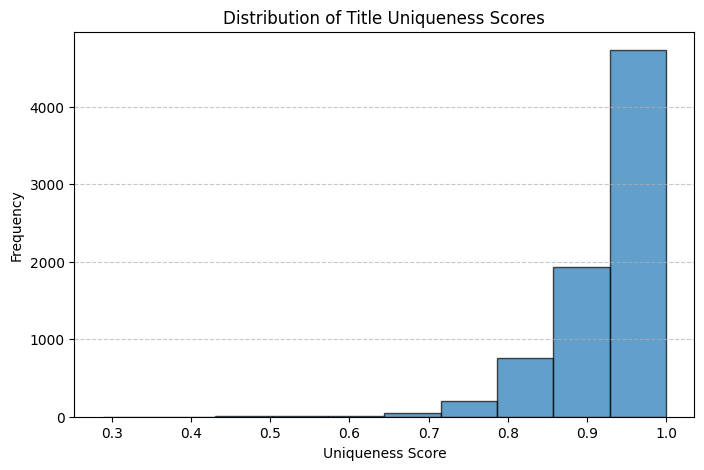

0.92456275514288

In [31]:
### Doing some EDA of the title uniqueness values since they seem HUGELY skewed right (expected, but maybe we can normalize them?)

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(combined_df['title_uniqueness'], bins=10, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Uniqueness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Title Uniqueness Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import statistics
statistics.mean(combined_df['title_uniqueness'])

In [32]:
### Attempting to get a better distribution of uniqueness score values (so that they are more interpretable) by performing a log normalization on the 'title_uniqueness' column.

import numpy as np

# Start with a log transformation and min-max scaling
combined_df['temp_transformed_title_uniqueness'] = np.log(combined_df['title_uniqueness'] - combined_df['title_uniqueness'].min() + 1)
# Normalize back to [0,1] scale
combined_df['normalized_title_uniqueness'] = (combined_df['temp_transformed_title_uniqueness'] - combined_df['temp_transformed_title_uniqueness'].min()) / (
    combined_df['temp_transformed_title_uniqueness'].max() - combined_df['temp_transformed_title_uniqueness'].min()
)

In [33]:
### DROPPING UNWANTED COLUMN (ONLY RUN ONCE)
combined_df = combined_df.drop(columns=['temp_transformed_title_uniqueness'])

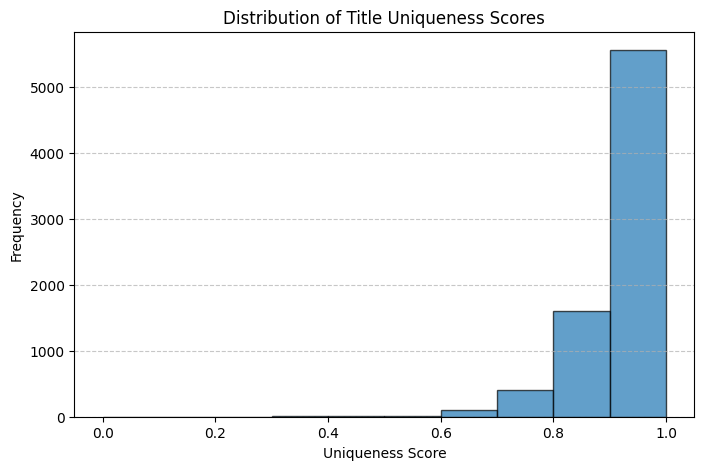

0.9147804022790873

In [34]:
### Going back to EDA to check the interpretability of the new, normalized title uniqueness scores

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(combined_df['normalized_title_uniqueness'], bins=10, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Uniqueness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Title Uniqueness Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import statistics
statistics.mean(combined_df['normalized_title_uniqueness'])

In [45]:
### Since the log transformation and renormalization barely helped the interpretability of the scores at all (it is so heavily skewed),
### I will try a Box-Cox Transformation with a min-max scaling to re-adjust the range to [0,1]

from scipy import stats
import numpy as np

# Apply Box-Cox transformation
combined_df['boxcox_uniqueness'], lambda_val = stats.boxcox(combined_df['title_uniqueness'] - combined_df['title_uniqueness'].min() + 1)

# Clip extreme values before Min-Max Scaling (adjust 99.5 percentile if needed)
clip_threshold = np.percentile(combined_df['boxcox_uniqueness'], 99.5)
combined_df['boxcox_uniqueness_clipped'] = np.clip(combined_df['boxcox_uniqueness'], None, clip_threshold)

# Min-Max Scale After Clipping
combined_df['BoxCox_Normalized'] = (combined_df['boxcox_uniqueness_clipped'] - combined_df['boxcox_uniqueness_clipped'].min()) / (
    combined_df['boxcox_uniqueness_clipped'].max() - combined_df['boxcox_uniqueness_clipped'].min()
)

# # Min-max scaling
# combined_df['boxcox_normalized_title_uniqueness'] = (combined_df['boxcox_uniqueness'] - combined_df['boxcox_uniqueness'].min()) / (
#     combined_df['boxcox_uniqueness'].max() - combined_df['boxcox_uniqueness'].min()
# )

KeyError: 'title_uniqueness'

In [36]:
### Since Box-Cox is failing me, let's try Yeo-Johnson

from scipy import stats

# Apply Yeo-Johnson Transformation
combined_df['YeoJohnson_Uniqueness'], lambda_val = stats.yeojohnson(combined_df['title_uniqueness'])

# Add a small random jitter to break ties
combined_df['Jittered'] = combined_df['YeoJohnson_Uniqueness'] + np.random.uniform(-0.0001, 0.0001, size=len(combined_df))

# Apply Min-Max Scaling
combined_df['Jittered_Normalized'] = (combined_df['Jittered'] - combined_df['Jittered'].min()) / (combined_df['Jittered'].max() - combined_df['Jittered'].min())

In [37]:
### Yeo-Johnson also failed, so let's try a Quantile transformation

from sklearn.preprocessing import QuantileTransformer

# Apply Quantile Transformation (spreads values more evenly)
qt = QuantileTransformer(output_distribution='uniform')
combined_df['Rank_Normalized'] = qt.fit_transform(combined_df[['title_uniqueness']])

In [38]:
### DROPPING UNWANTED COLUMN (ONLY RUN ONCE)
combined_df = combined_df.drop(columns=['boxcox_uniqueness'])

In [39]:
### DROPPING UNWANTED COLUMN (ONLY RUN ONCE)
combined_df = combined_df.drop(columns=['normalized_title_uniqueness'])

In [40]:
### DROPPING UNWANTED COLUMN (ONLY RUN ONCE)
combined_df = combined_df.drop(columns=['title_uniqueness'])

In [46]:
### Going back to EDA to check the interpretability of the new, Box-Cox transformed title uniqueness scores

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(combined_df['boxcox_normalized_title_uniqueness'], bins=10, edgecolor='black', alpha=0.7)

# Labels and title
plt.xlabel("Uniqueness Score")
plt.ylabel("Frequency")
plt.title("Distribution of Title Uniqueness Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

import statistics
statistics.mean(combined_df['boxcox_normalized_title_uniqueness'])

KeyError: 'boxcox_normalized_title_uniqueness'

<Figure size 800x500 with 0 Axes>

In [ ]:
combined_df.head()

In [ ]:
print(combined_df['Jittered_Normalized'])

In [ ]:
combined_df.info()

In [ ]:
filtered_rows = combined_df[combined_df['Rank_Normalized'] == 1]
print(filtered_rows)

In [ ]:
filtered_rows = combined_df[combined_df['Jittered_Normalized'] == 1]
print(filtered_rows)

In [ ]:
# Export final modifed dataset to csv
final_df = combined_df.copy()
final_df.to_csv('modified_v2.csv')